In [1]:
# pandas loads and manages our data
import pandas as pd
# datetime will convert unix time to a calendar date
from datetime import datetime

In [2]:
# upload json from local folder
df = pd.read_json('d3.json')

In [3]:
# sort table values highest to lowest byt total commits. Head() because we don't need to see it all.
df.sort_values('total', ascending=False).head()

,days,total,week
16,"[0, 2, 0, 0, 4, 0, 2]",8,1485043200
15,"[0, 0, 0, 2, 0, 4, 0]",6,1484438400
32,"[0, 2, 2, 0, 0, 0, 0]",4,1494720000
21,"[0, 0, 2, 0, 2, 0, 0]",4,1488067200
20,"[4, 0, 0, 0, 0, 0, 0]",4,1487462400


In [4]:
# week time attached to row index 16 in column week
week = df['week'][16]
week

1485043200

In [5]:
# week converted from unix time to calendar date
human_time = datetime.fromtimestamp(float(week)).isoformat()
print(human_time)

2017-01-21T17:00:00


# Day of the Week with Most Commits

In [6]:
# days are index 0:Sunday, 1:Monday, etc... in array in 'days' column
def this_is_probably_too_much_effort(df_index):
    """
    Takes index that corresponds to day of week, and returns 
    array of commits on that day each week.
    """
    day_arr = []
    for arr in df['days']:
        day_arr.append(arr[df_index])
    return day_arr

In [7]:
# dictionary to hold day kay, and array of commits value
d = {}
# array of future keys
days = ['sun', 'mon', 'tues', 'wed', 'thurs', 'fri', 'sat']
# will help iterate through days of week
i = 0
# for each day key in days
for day in days:
    # day key = array of commits for that day of the week
    d[day] = this_is_probably_too_much_effort(i)
    # move index to next day
    i += 1

print(d['sat'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]


In [8]:
# create dataframe from dictionary with days:array of commits
df_days = pd.DataFrame(d)
df_days.head()

,fri,mon,sat,sun,thurs,tues,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,2,0
2,0,0,0,0,2,0,1
3,0,0,0,0,3,0,0
4,2,0,0,0,0,0,1


In [9]:
# Sums all columns. Friday is has the highest total with 17 commits
df_days.sum()

fri      17
mon       7
sat       7
sun       6
thurs    11
tues      8
wed       6
dtype: int64

# Plot Data

In [10]:
# for future bar plot
import matplotlib.pyplot as plt
%matplotlib inline

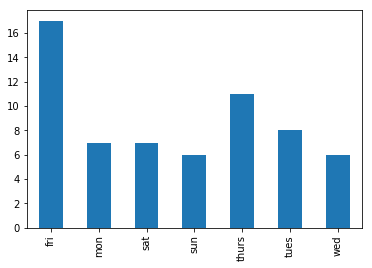

In [11]:
# creates and defines plot
df_days.sum().plot(kind='bar')

# Something Else!

How many authors have contributed to D3.js?

In [12]:
# included web address so my because different than original data
df_contributors = pd.read_json('https://api.github.com/repos/d3/d3/stats/contributors')

In [13]:
# several measures, with count showing the number of authors
df_contributors.describe()

,total
count,100.000000
mean,33.770000
std,241.100711
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,2301.000000


ANSWER: There's been exactly 100 contributors at this point in D3.js's history!